How about trying to validate the established idea of human sensitiveness to price drops ? (discounted price compared to original retail_price)
You may look for top categories of products so that you know what sells best
Do bad products sell ? How about the relationship between the quality of a product (ratings) and its success ? 
Does the price factor into this ?

In [17]:
import numpy as np
import pandas as pd
import os
from sklearn.cluster import KMeans
import seaborn as sns
from nltk.stem.porter import PorterStemmer

In [2]:
bajada = pd.read_csv('summer-products-with-rating-and-performance_2020-08.csv', sep = ',')

In [3]:
df = bajada.copy()

In [4]:
df = df[['title',  'price',  'retail_price', 'units_sold',  'rating',  'rating_count','tags','product_id']]
df.head(1)

,title,price,retail_price,units_sold,rating,rating_count,tags,product_id
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.0,14,100,3.76,54,"Summer,Fashion,womenunderwearsuit,printedpajam...",5e9ae51d43d6a96e303acdb0


In [5]:
print(df.describe(), df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1573 non-null   object 
 1   price         1573 non-null   float64
 2   retail_price  1573 non-null   int64  
 3   units_sold    1573 non-null   int64  
 4   rating        1573 non-null   float64
 5   rating_count  1573 non-null   int64  
 6   tags          1573 non-null   object 
 7   product_id    1573 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 98.4+ KB
             price  retail_price     units_sold       rating  rating_count
count  1573.000000   1573.000000    1573.000000  1573.000000   1573.000000
mean      8.325372     23.288620    4339.005086     3.820896    889.659250
std       3.932030     30.357863    9356.539302     0.515374   1983.928834
min       1.000000      1.000000       1.000000     1.000000      0.000000
25%       5.810000      7.

In [6]:
df['tags_splitted'] = [[*item.split(',')] for item in df['tags_splitted'] ]
df = df.drop('tags', axis = 1)
df.head(1)

,title,price,retail_price,units_sold,rating,rating_count,product_id,tags_splitted
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.0,14,100,3.76,54,5e9ae51d43d6a96e303acdb0,"[summer, fashion, womenunderwearsuit, printedp..."


In [14]:
df.loc[:, 'diferencia_precios'] = df['retail_price']/df['price']-1
columnas = ['price', 'diferencia_precios','units_sold', 'rating']

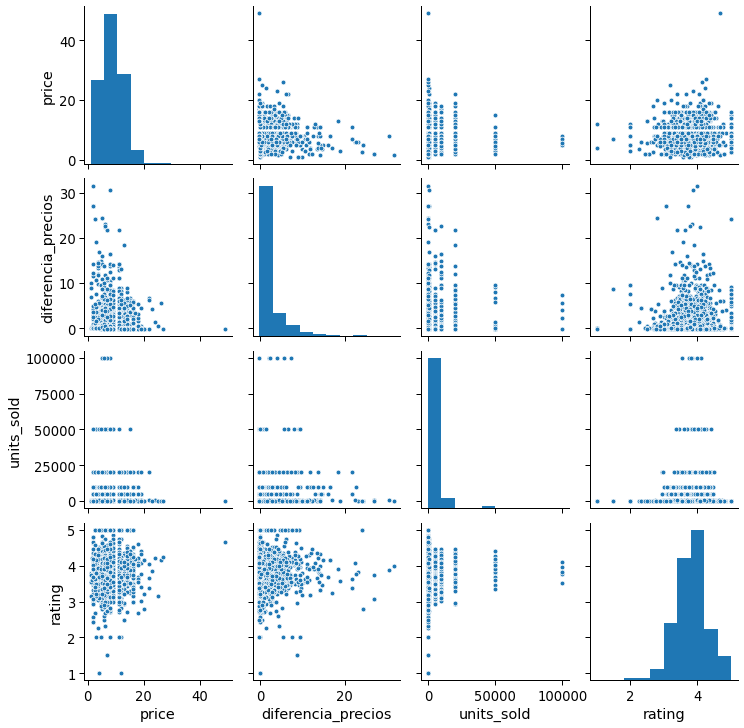

In [18]:
sns.set_context("paper", font_scale =1.5)
sns.pairplot(df[columnas])

In [15]:

km = KMeans(n_clusters = 4, init = 'random', random_state = 0)
y_km = km.fit_predict(df[columnas])
df['Cluster'] = y_km
df.head()

,title,price,retail_price,units_sold,rating,rating_count,product_id,tags_splitted,diferencia_precios,Cluster
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,100,3.76,54,5e9ae51d43d6a96e303acdb0,"[summer, fashion, womenunderwearsuit, printedp...",-0.125000,0
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,8.00,22,20000,3.45,6135,58940d436a0d3d5da4e95a38,"[mini, womens dresses, summer, patchwork, fash...",1.750000,3
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,8.00,43,100,3.57,14,5ea10e2c617580260d55310a,"[summer, cardigan, women beachwear, chiffon, s...",4.375000,0
3,Hot Summer Cool T-shirt pour les femmes Mode T...,8.00,8,5000,4.03,579,5cedf17ad1d44c52c59e4aca,"[summer, shorts, cotton, cotton t shirt, sleev...",0.000000,1
4,Femmes Shorts d'été à lacets taille élastique ...,2.72,3,100,3.10,20,5ebf5819ebac372b070b0e70,"[summer, plus size, lace, casual pants, bottom...",0.102941,0


In [12]:
list(df)

['title',
 'price',
 'retail_price',
 'units_sold',
 'rating',
 'rating_count',
 'product_id',
 'tags_splitted']